# Datenverständnis

In diesem Notebook werden unbereinigte Datensätze analysiert.

Der Datensatz wird beschrieben und es werden Informationen wie die Sterneverteilung, durchschnittliche Bewertung und die durchschnittliche Anzahl der Bewertungen pro Artikel geliefert.

### Import

In [4]:
import pandas as pd
import gzip
import seaborn as sns

### Erzeugen eines Data Frames

In [5]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

def data_understanding_1(path):
    return getDF(path)

#### Einlesen der Daten

*Die Variable "path" muss durch den Pfad der Datei ersetzt werden.*

In [6]:
df=data_understanding_1('../Data_raw/reviews_Musical_Instruments_5.json.gz')

### Analyse des Data Frames

#### Sterneverteilung

In [15]:
df["overall"].value_counts().sort_index()

1.0     217
2.0     250
3.0     772
4.0    2084
5.0    6938
Name: overall, dtype: int64

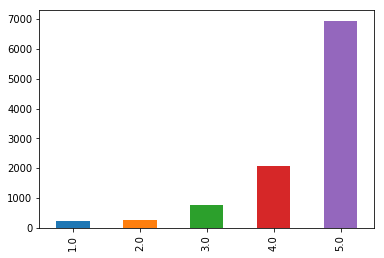

In [14]:
df.overall.value_counts().sort_index().plot.bar();

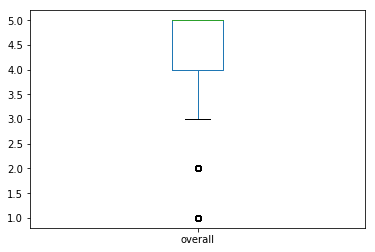

In [16]:
df.overall.plot.box();

#### Durchschnittliche Bewertungen pro Artikel

In [27]:
df["asin"].count()/(df["asin"].value_counts().count())

11.401111111111112

#### Durchschnittliche Bewertung

In [8]:
df["overall"].sum()/df.shape[0]

4.488743787155248

#### Anzahl Zeilen und Spalten

In [9]:
df.shape

(10261, 9)

#### Information der Daten

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10261 entries, 0 to 10260
Data columns (total 9 columns):
reviewerID        10261 non-null object
asin              10261 non-null object
reviewerName      10234 non-null object
helpful           10261 non-null object
reviewText        10261 non-null object
overall           10261 non-null float64
summary           10261 non-null object
unixReviewTime    10261 non-null int64
reviewTime        10261 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 801.6+ KB


#### Beschreibung der Daten

In [11]:
df.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


#### Auf Nullwerte überprüfen

In [12]:
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

#### Header der Daten

In [13]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


### Zusammenfassende Funktion

In [6]:
import pandas as pd
import gzip
import numpy as np
import time

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

def data_understanding_1():
    df3={}
    namelist=[]
    medianlist=[]
    average_counter_scorelist=[]
    average_scorelist=[]
    counter_articlelist=[]
    star1list=[]
    star2list=[]
    star3list=[]
    star4list=[]
    star5list=[]
    category = {
        "books" : "reviews_Books_5.json.gz",
        "electronics" : "reviews_Electronics_5.json.gz",
        "movies_and_tv" : "reviews_Movies_and_TV_5.json.gz",
        "cd_and_vinyl" : "reviews_CDs_and_Vinyl_5.json.gz",
        "clothing_shoes_jewelry" : "reviews_Clothing_Shoes_and_Jewelry_5.json.gz",
        "home_and_kitchen" : "reviews_Home_and_Kitchen_5.json.gz",
        "kindle_store" : "reviews_Kindle_Store_5.json.gz",
        "sports_and_outdoors" : "reviews_Sports_and_Outdoors_5.json.gz",
        "cell_phones_and_accessories" : "reviews_Cell_Phones_and_Accessories_5.json.gz",
        "health_and_personal_care" : "reviews_Health_and_Personal_Care_5.json.gz",
        "toys_and_games" : "reviews_Toys_and_Games_5.json.gz",
        "video_games" : "reviews_Video_Games_5.json.gz",
        "tools_and_home_improvement" : "reviews_Tools_and_Home_Improvement_5.json.gz",
        "beauty" : "reviews_Beauty_5.json.gz",
        "apps_for_android" : "reviews_Apps_for_Android_5.json.gz",
        "office_products" : "reviews_Office_Products_5.json.gz",
        "pet_supplies" : "reviews_Pet_Supplies_5.json.gz",
        "automotive" : "reviews_Automotive_5.json.gz",
        "grocery_and_gourmet_food" : "reviews_Grocery_and_Gourmet_Food_5.json.gz",
        "patio_lawn_and_garden" : "reviews_Patio_Lawn_and_Garden_5.json.gz",
        "baby" : "reviews_Baby_5.json.gz",
        "digital_music" : "reviews_Digital_Music_5.json.gz",
        "musical_instruments" : "reviews_Musical_Instruments_5.json.gz",
        "amazon_instant_video" : "reviews_Amazon_Instant_Video_5.json.gz" }
    
    print("Abgeschlossene Datensätze:")
    
    for key in category:
        df = getDF("../Data_Raw/%s" %category[key])
        
        # Fortschrittsanzeige
        print(key)
        
        # Name des Datensatzes
        name = key
        
        # Median der Sterneverteilung
        median = np.median(df["overall"])

        # Durchschnittliche Anzahl Bewertungen pro Artikel
        average_counter_score= df["asin"].count()/(df["asin"].value_counts().count())

        # Durchschnittliche Bewertung
        average_score = df["overall"].sum()/df.shape[0]

        # Anzahl der Artikel im Datensatz
        counter_article = df["asin"].value_counts().count()

        # Sterneverteilung sortiert in Prozent
        e = df["overall"].value_counts(normalize=True).sort_index().values.tolist()

        # Prozentualer Anteil 1-Sterne Bewertungen
        star1 = round(e[0],2)

        # Prozentualer Anteil 2-Sterne Bewertungen
        star2 = round(e[1],2)

        # Prozentualer Anteil 3-Sterne Bewertungen
        star3 = round(e[2],2)

        # Prozentualer Anteil 4-Sterne Bewertungen
        star4 = round(e[3],2)

        # Prozentualer Anteil 5-Sterne Bewertungen
        star5 = round(e[4],2)
        
        namelist.append(name)
        medianlist.append(median)
        average_counter_scorelist.append(average_counter_score)
        average_scorelist.append(average_score)
        counter_articlelist.append(counter_article)
        star1list.append(star1)
        star2list.append(star2)
        star3list.append(star3)
        star4list.append(star4)
        star5list.append(star5)
    
    # Erzeugen eines DataFrames
    data = {"Datensatz": namelist,'Durchschnittliche Anzahl an Bewertungen pro Artikel': average_counter_scorelist, "Durchschnittliche Bewertung": average_scorelist, "Median der Bewertung":medianlist, "Anzahl an Artikeln":counter_articlelist, "Prozentualer Anteil 5-Sterne Bewertungen":star5list, "Prozentualer Anteil 4-Sterne Bewertungen":star4list, "Prozentualer Anteil 3-Sterne Bewertungen":star3list, "Prozentualer Anteil 2-Sterne Bewertungen": star2list , "Prozentualer Anteil 1-Sterne Bewertungen":star1list}
    df2 = pd.DataFrame(data=data)

    # Export in CSV Datei
    df2.to_csv("Data_understanding_csv/all_reviews.csv", sep=',',index=False) #%category[key], sep=',',index=False)
    
    # Darstellung in einer Tabelle
    return df2
        

In [2]:
data_understanding_1()

Abgeschlossene Datensätze:
books
electronics
movies_and_tv
cd_and_vinyl
clothing_shoes_jewelry
home_and_kitchen
kindle_store
sports_and_outdoors
cell_phones_and_accessories
health_and_personal_care
toys_and_games
video_games
tools_and_home_improvement
beauty
apps_for_android
office_products
pet_supplies
automotive
grocery_and_gourmet_food
patio_lawn_and_garden
baby
digital_music
musical_instruments
amazon_instant_video


,Datensatz,Durchschnittliche Anzahl an Bewertungen pro Artikel,Durchschnittliche Bewertung,Median der Bewertung,Anzahl an Artikeln,Prozentualer Anteil 5-Sterne Bewertungen,Prozentualer Anteil 4-Sterne Bewertungen,Prozentualer Anteil 3-Sterne Bewertungen,Prozentualer Anteil 2-Sterne Bewertungen,Prozentualer Anteil 1-Sterne Bewertungen
0,books,24.180642,4.249932,5.0,367982,0.56,0.25,0.11,0.05,0.04
1,electronics,26.812082,4.222779,5.0,63001,0.60,0.21,0.08,0.05,0.06
2,movies_and_tv,33.915388,4.110648,5.0,50052,0.53,0.23,0.12,0.06,0.06
3,cd_and_vinyl,17.031982,4.294394,5.0,64443,0.60,0.22,0.09,0.04,0.04
4,clothing_shoes_jewelry,12.099032,4.245133,5.0,23033,0.59,0.21,0.11,0.06,0.04
5,home_and_kitchen,19.537557,4.316655,5.0,28237,0.63,0.19,0.08,0.04,0.05
6,kindle_store,15.865583,4.347801,5.0,61934,0.59,0.26,0.10,0.03,0.02
7,sports_and_outdoors,16.142997,4.393451,5.0,18357,0.64,0.22,0.08,0.03,0.03
8,cell_phones_and_accessories,18.644069,4.129912,5.0,10429,0.56,0.21,0.11,0.06,0.07
9,health_and_personal_care,18.687547,4.274958,5.0,18534,0.61,0.20,0.10,0.05,0.05


# Visualisierung

In [3]:
import seaborn as sns
import pandas as pd

In [50]:
df3= pd.read_csv("./Data_understanding_csv/all_reviews.csv")

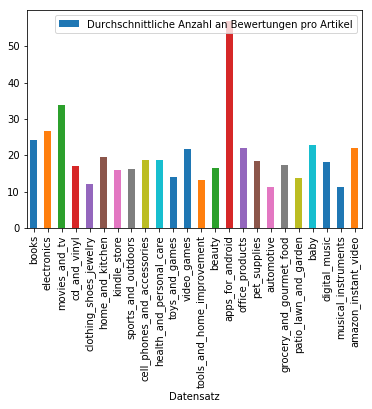

In [66]:
ax=df3.plot.bar(x="Datensatz",y="Durchschnittliche Anzahl an Bewertungen pro Artikel")

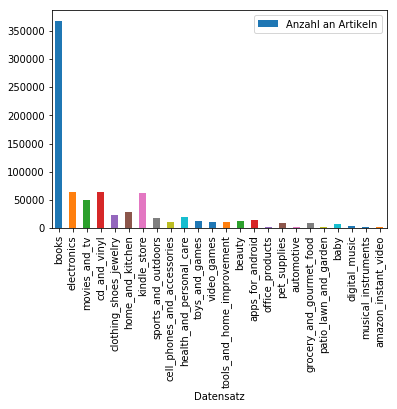

In [67]:
ax=df3.plot.bar(x="Datensatz",y="Anzahl an Artikeln")

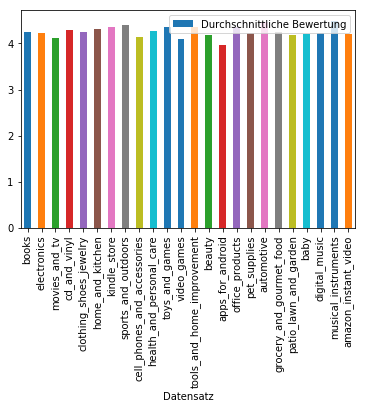

In [68]:
ax=df3.plot.bar(x="Datensatz",y="Durchschnittliche Bewertung")

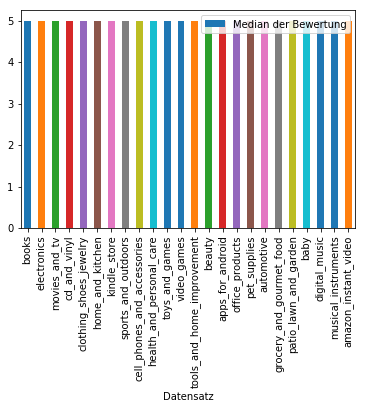

In [69]:
ax=df3.plot.bar(x="Datensatz",y="Median der Bewertung")

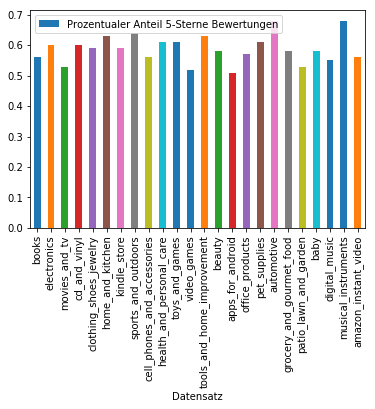

In [71]:
ax=df3.plot.bar(x="Datensatz",y="Prozentualer Anteil 5-Sterne Bewertungen")

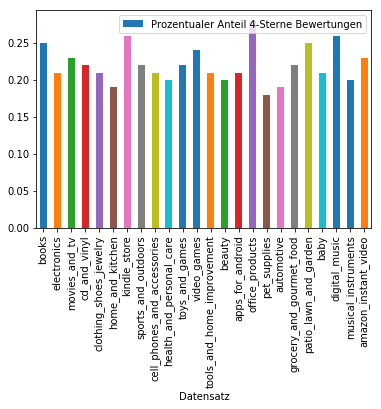

In [72]:
ax=df3.plot.bar(x="Datensatz",y="Prozentualer Anteil 4-Sterne Bewertungen")

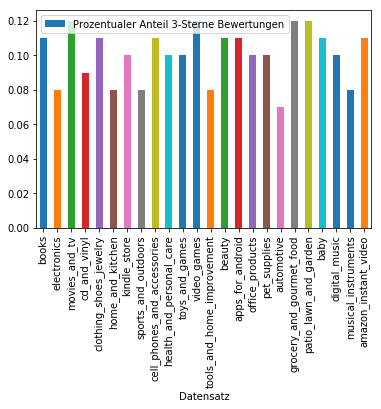

In [73]:
ax=df3.plot.bar(x="Datensatz",y="Prozentualer Anteil 3-Sterne Bewertungen")

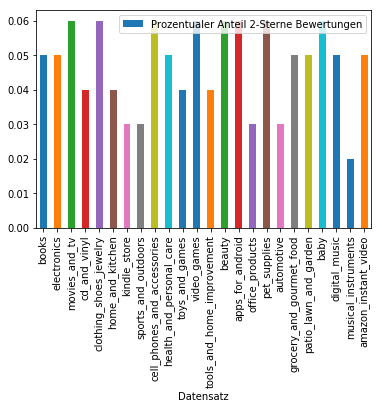

In [74]:
ax=df3.plot.bar(x="Datensatz",y="Prozentualer Anteil 2-Sterne Bewertungen")

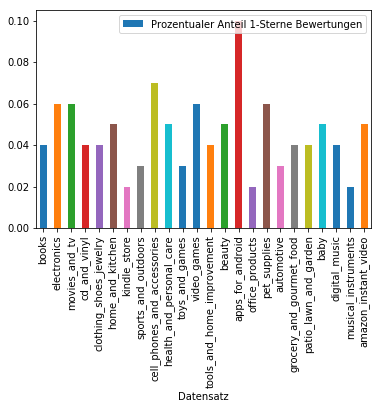

In [75]:
ax=df3.plot.bar(x="Datensatz",y="Prozentualer Anteil 1-Sterne Bewertungen")

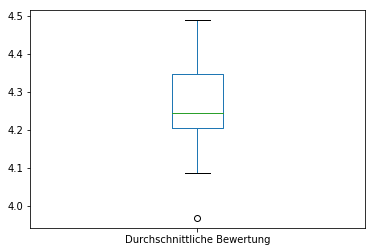

In [88]:
ax=df3.plot.box(y="Durchschnittliche Bewertung", x="Anzahl an Artikeln")

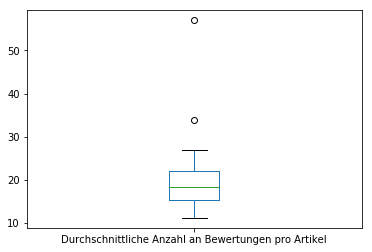

In [90]:
ax=df3.plot.box(x="Durchschnittliche Bewertung", y="Durchschnittliche Anzahl an Bewertungen pro Artikel")